# **Anaemia Detection**

##  **Importing Necessary Libraries**

In [10]:
import numpy as np
import pandas as pd 
%matplotlib widget
impotensorflow.keras.modelsrt tensorflow as tf
from  import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sb
import plotly.figure_factory as px
import pickle
from sklearn.linear_model import LogisticRegression

In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **Loading The Dataset**

In [12]:
df = pd.read_csv("anemia.csv")
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [13]:
df_pos  =df[df["Result"]==0]
df_pos = df_pos.head(181)
df.drop(df_pos.index,inplace = True)

In [14]:
df.reset_index(inplace = True)

In [15]:
df.drop(['index'],axis =1,inplace=True)
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0,9.0,21.5,29.6,71.2,1
1,0,11.6,22.3,30.9,74.5,1
2,1,12.7,19.5,28.9,82.9,1
3,1,12.7,28.5,28.2,92.3,1
4,1,13.0,18.3,29.6,87.8,1
...,...,...,...,...,...,...
1235,0,10.6,25.4,28.2,82.9,1
1236,1,12.1,28.3,30.4,86.9,1
1237,1,13.1,17.7,28.1,80.7,1
1238,0,14.3,16.2,29.5,95.2,0


In [16]:
x = np.array(df.drop("Result",axis = 1))
y = np.array(df["Result"])
y_df = pd.DataFrame(df['Result'])

In [17]:
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=9)

for train_index,test_index in split.split(df,df['Result']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [18]:
a = strat_train_set['Result'].value_counts()
print(f"Training Samples : {len(strat_train_set)}")
print(f"Train ratio = 1 : {a[0]/a[1]}")

Training Samples : 992
Train ratio = 1 : 1.0


In [19]:
b = strat_test_set['Result'].value_counts()
print(f"Testing Samples : {len(strat_test_set)}")
print(f"Test ratio = 1  : {b[0]/b[1]}")

Testing Samples : 248
Test ratio = 1  : 1.0


In [20]:
x_train = np.array(strat_train_set.drop('Result',axis=1))
y_train = np.array(strat_train_set['Result'])
x_tst = np.array(strat_test_set.drop('Result',axis =1))
y_tst = np.array(strat_test_set['Result'])

In [21]:
print(f'''x_train Shape : {x_train.shape}
x_test Shape : {x_tst.shape}

''')

x_train Shape : (992, 5)
x_test Shape : (248, 5)




## **Modelling**

In [22]:
model = Sequential([
    Dense(128,activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(40,activation = 'relu',kernel_regularizer= tf.keras.regularizers.l2(0.1)),
    Dense(1,activation= 'linear')
])

In [23]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=  tf.keras.optimizers.Adam(learning_rate = 0.01),
               
             metrics = ["accuracy"])

**Model For Train Set**

In [24]:
hist_train = model.fit(x_train,y_train,epochs=100)

Epoch 1/100
31/31 [==============================] - 3s 4ms/step - loss: 3.8173 - accuracy: 0.5161
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 1.7161 - accuracy: 0.5806
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 1.2994 - accuracy: 0.5927
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 1.1047 - accuracy: 0.6129
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.9058 - accuracy: 0.6522
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8015 - accuracy: 0.6381
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7476 - accuracy: 0.7147
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8395 - accuracy: 0.6462
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8033 - accuracy: 0.5181
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.6079
Epoch 11/

**Model for Test Set**

In [25]:
hist_tst = model.fit(x_tst,y_tst,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.2968 - accuracy: 0.8952
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.8831
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8911
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.9032
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2680 - accuracy: 0.9234
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9355
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.9355
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.9395
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.9073
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9435
Epoch 11/100
8/8 [===========

### Detail about the accuracy and loss of the model

In [26]:
hist_m2_tr = pd.DataFrame(hist_train.history)
hist_m2_tr.rename(columns={'loss':'train loss','accuracy' : "train acc"},inplace=True)
hist_m2_ts = pd.DataFrame(hist_tst.history)
hist_m2_ts.rename(columns={'loss':'test loss',"accuracy":"test acc"},inplace = True)
con = [hist_m2_ts,hist_m2_tr]

comb2 = pd.concat(con,axis=1,join="inner")
comb2

,test loss,test acc,train loss,train acc
0,0.296763,0.895161,3.817345,0.516129
1,0.309702,0.883065,1.716120,0.580645
2,0.308521,0.891129,1.299352,0.592742
3,0.307110,0.903226,1.104727,0.612903
4,0.267971,0.923387,0.905808,0.652218
...,...,...,...,...
95,0.243501,0.935484,0.256754,0.926411
96,0.267133,0.915323,0.252930,0.931452
97,0.251009,0.935484,0.267487,0.919355
98,0.248755,0.923387,0.261745,0.921371


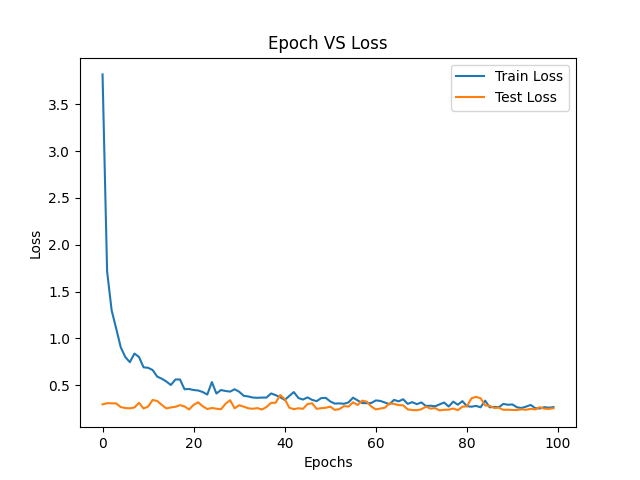

In [27]:
fig,ax = plt.subplots(1,1)
ax.plot(np.arange(100),comb2['train loss'],label = 'Train Loss')
ax.plot(np.arange(100),comb2['test loss'],label = 'Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch VS Loss")
plt.legend()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 40)                5160      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 5,969
Trainable params: 5,969
Non-trainable params: 0
_________________________________________________________________


In [29]:
def my_predict(x,pos=None):
    
    p2 = model.predict(x)
    pr2 = tf.nn.sigmoid(p2)
    a2 = np.zeros(len(pr2))
    for i in range(len(pr2)):
        if pr2[i]>0.5:
            a2[i] = np.array(pr2[i])
            a2[i] =  1
        else :
            a2[i] = np.array(pr2[i])
            a2[i]  = 0

    
    return a2

## **Checking Model Prediction By Confusion Matrix**

In [30]:
prd_train = my_predict(x_train)
cd = confusion_matrix(y_train,prd_train)

31/31 [==============================] - 0s 2ms/step


In [31]:
cm_display = ConfusionMatrixDisplay(cd)

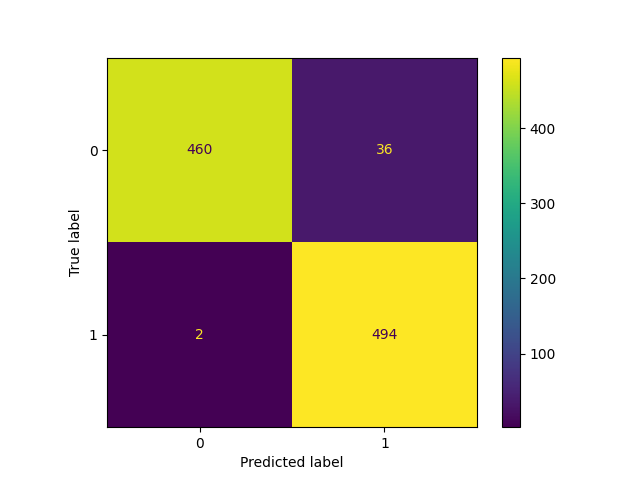

In [32]:
cm_display.plot()
plt.show()

In [33]:
print(classification_report(y_train,prd_train))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       496
           1       0.93      1.00      0.96       496

    accuracy                           0.96       992
   macro avg       0.96      0.96      0.96       992
weighted avg       0.96      0.96      0.96       992



In [34]:
pre = cd[0,0]/(cd[0,0]+cd[0,1])
rec = cd[0,0]/(cd[0,0]+cd[1,0])
f1 = 2*pre*rec/(pre+rec)

In [35]:
print(f'''Precision : {pre}
Recall : {rec:.2f}
F1 Score : {f1:.2f}''')

Precision : 0.9274193548387096
Recall : 1.00
F1 Score : 0.96


In [36]:
prd_tst1 = my_predict(x_tst)

8/8 [==============================] - 0s 2ms/step


In [37]:
print(f" Model1 Accuracy : {accuracy_score(y_train,prd_train)}")
print(f" Model2 Accuracy : {accuracy_score(y_tst,prd_tst1)}")

 Model1 Accuracy : 0.9616935483870968
 Model2 Accuracy : 0.9435483870967742


In [38]:
imp1 = np.array([[0,11.9,28.3,31.9,88.8]])

my_predict(imp1)

1/1 [==============================] - 0s 35ms/step


array([1.])

In [39]:
imp2 = np.array([[1,13.5,26.9,32.6,82.6]])

my_predict(imp2)

1/1 [==============================] - 0s 41ms/step


array([1.])

## **Checking Model Prediction by Logistic Regression**

In [40]:
logr = LogisticRegression()

In [41]:
logr.fit(x_train,y_train)

LogisticRegression()

In [42]:
prd_logr = logr.predict(x_train)
prd_tst = logr.predict(x_tst)

In [43]:
cm_log = confusion_matrix(y_train,prd_logr)

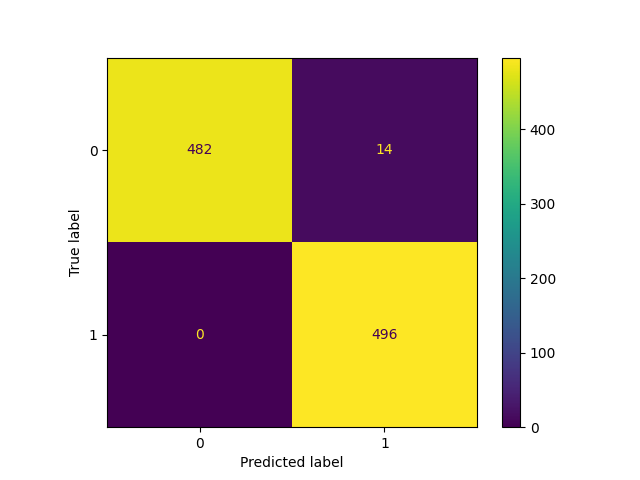

In [44]:
cm_d = ConfusionMatrixDisplay(cm_log)
cm_d.plot()

In [45]:
pre_lg = cm_log[0,0]/(cm_log[0,0]+cm_log[0,1])
rec_lg = cm_log[0,0]/(cm_log[0,0]+cm_log[1,0])
f11_lg = 2*pre_lg*rec_lg/(pre_lg+rec_lg)




print(f'''Precision : {pre_lg}
Recall : {rec_lg:.2f}
F1 Score : {f11_lg:.2f}''')

Precision : 0.9717741935483871
Recall : 1.00
F1 Score : 0.99


In [46]:
cm_log

array([[482,  14],
       [  0, 496]], dtype=int64)

In [47]:
print(classification_report(y_train,prd_logr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       496
           1       0.97      1.00      0.99       496

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [48]:
print(classification_report(y_tst,prd_tst))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       124
           1       0.96      1.00      0.98       124

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [49]:
logr.predict(imp1)

array([1], dtype=int64)

In [50]:
logr.predict(imp2)

array([1], dtype=int64)

## **Train with Decision Tree**

In [51]:
tree_cf = DecisionTreeClassifier()
tree_cf.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
prd_tree = tree_cf.predict(x_train)
prd_tst_tree = tree_cf.predict(x_tst)

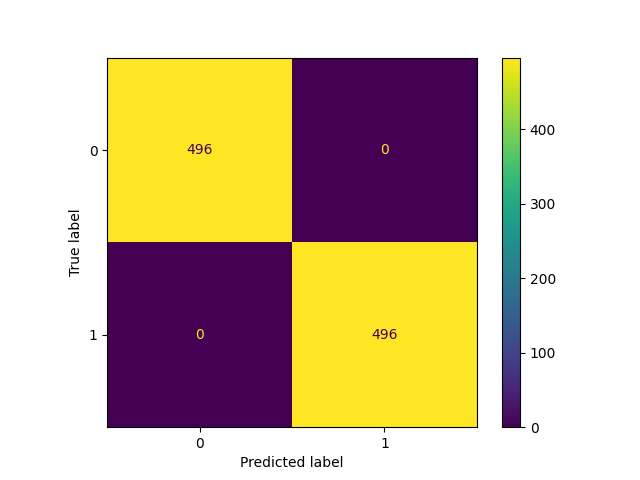

In [53]:
cm_t = confusion_matrix(y_train,prd_tree)
cm_d = ConfusionMatrixDisplay(cm_t)
cm_d.plot()

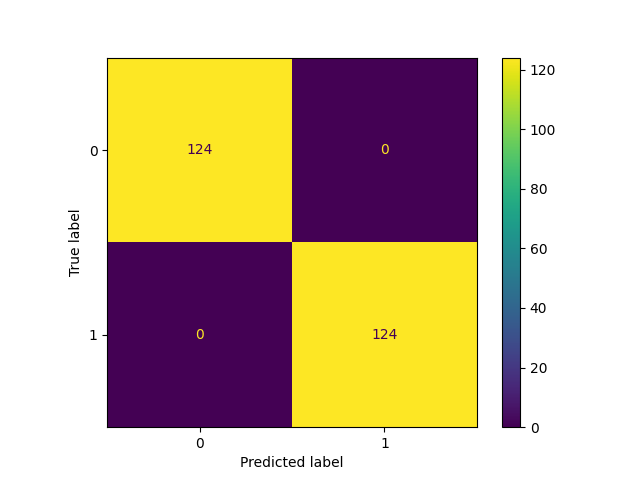

In [54]:
cm_tt = confusion_matrix(y_tst,prd_tst_tree)
cm_d = ConfusionMatrixDisplay(cm_tt)
cm_d.plot()

In [55]:
print(classification_report(y_train,prd_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



In [56]:
np.mean(cross_val_score(tree_cf,x_train,y_train,cv =10))

1.0

In [57]:
tree_cf.predict(imp1)

array([1], dtype=int64)

In [58]:
tree_cf.predict(imp2)

array([0], dtype=int64)

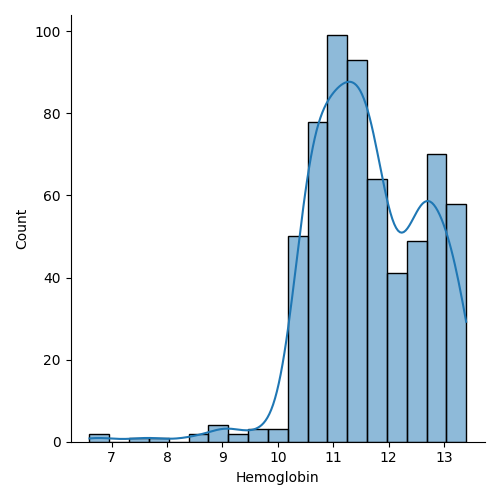

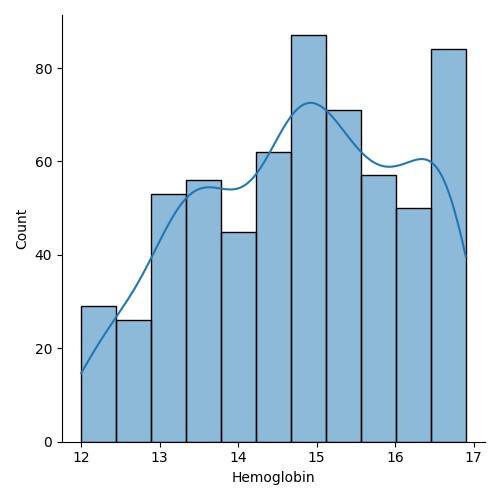

In [59]:
sb.displot(df[df['Result'] == 1]['Hemoglobin'],kde = True)
sb.displot(df[df['Result'] == 0]['Hemoglobin'],kde = True)

In [60]:
a =list((df[df['Result'] == 1]['Hemoglobin']))
b =list((df[df['Result'] == 0]['Hemoglobin']))
c = [a,b]

px.create_distplot(hist_data=c,group_labels=['True','False'],show_rug=False,colors=['Red','Green'])

In [61]:
a =list((df[df['Result'] == 1]['MCH']))
b =list((df[df['Result'] == 0]['MCH']))
c = [a,b]

px.create_distplot(hist_data=c,group_labels=['True','False'],show_rug=False,colors=['Red','Green'])

In [62]:
a =list((df[df['Result'] == 1]['MCV']))
b =list((df[df['Result'] == 0]['MCV']))

c = [a,b]

px.create_distplot(hist_data=c,group_labels=['True','False'],show_rug=False,colors=['red','lightgreen'])

## **Pickling the file**

In [63]:
import pickle

In [64]:
with open('anemia_detection', 'wb') as files:
    pickle.dump(tree_cf, files)

In [65]:
with open('anemia_detection' , 'rb') as f:
    lr = pickle.load(f)